In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#from pyproj import Proj, transform
from shapely.geometry import Point

In [2]:
slum = gpd.read_file("C:\\Users\\ymamo\\Kibera\\KIANDA_shapefile\\KIANDA_STRUCTURES\\Population_2\\kianda_structures_and_population_dataset.shp")
water = gpd.read_file("C:\\Users\\ymamo\\Kibera\\KIANDA_shapefile\\KIANDA_INFRA\\KIANDA_waterPT\\kibera_water_PT.shp")

In [3]:
water.crs

{'init': 'epsg:4326'}

In [ ]:
from functools import partial
import pyproj
from shapely.ops import transform

project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:4326'), # source coordinate system
    pyproj.Proj(init='epsg:26913')) # destination coordinate system



In [ ]:
new_poly = []
for poly in slum['geometry']: 
    new_poly.append(transform(project, poly))

slum['geometry'] = pd.Series(new_poly)


In [ ]:
new_poly = []
for poly in water['geometry']: 
    new_poly.append(transform(project, poly))

water['geometry'] = pd.Series(new_poly)
water2 = pd.Series(new_poly)


In [4]:
slum.head()

,MAT_WOO_D,FAM_S_D,RENT_STR,RENT_MEAN,BUSINESS,GEOMETRY,MAT_M_D,OWNER,RENT_MIN,WOMEN,...,MAT_IR,FAM_UP,POP_R,STRUCTURE,MAT_BR_D,STR_CODE,FAM_SP,FAM_S,SERV_O,geometry
0,0.0,0.0,1500,500,1.0,0.0,1.000,0.0,500.0,1.0,...,0.0,1.0,7.0,95.0,0.000,KIAS1S95S0,1.0,0.0,0.0,POLYGON ((36.77216635460993 -1.307986702127649...
1,0.0,0.0,0,0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,KIAS0S0S0,0.0,0.0,0.0,POLYGON ((36.77204591016548 -1.308091770685569...
2,0.0,0.0,0,0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,KIAS0S0S0,0.0,0.0,0.0,POLYGON ((36.77207025531914 -1.308077676122921...
3,0.0,0.3,17000,1700,1.0,0.0,0.250,1.0,1000.0,7.0,...,0.0,0.0,29.0,25.0,0.750,KIAS1S25S0,1.0,3.0,0.0,POLYGON ((36.77219454373522 -1.307967482269493...
4,0.0,0.0,12000,4000,2.0,0.0,0.333,1.0,0.0,1.0,...,0.0,0.0,3.0,24.0,0.667,KIAS1S24S0,1.0,0.0,0.0,POLYGON ((36.77235656464812 -1.307914315875614...


In [5]:
#slum_c = slum.loc[:,:]
#slum_c.drop(slum_c[slum_c["BUSI_C"] < 1].index)
slum_t = slum[slum["BUSI_C"] >= 1]
slum_c2 = slum_t[slum_t["STRUCTURE"] > 100 ]
slum_c2

,MAT_WOO_D,FAM_S_D,RENT_STR,RENT_MEAN,BUSINESS,GEOMETRY,MAT_M_D,OWNER,RENT_MIN,WOMEN,...,MAT_IR,FAM_UP,POP_R,STRUCTURE,MAT_BR_D,STR_CODE,FAM_SP,FAM_S,SERV_O,geometry
325,0.000,0.769,8100,900,1.0,0.0,1.000,0.0,700.0,1.0,...,0.0,2.0,18.0,125.0,0.000,KIAS2S125S,0.0,10.0,0.0,"POLYGON ((36.77226708465365 -1.3104884487038, ..."
499,0.000,0.667,6450,1075,1.0,0.0,1.000,1.0,800.0,2.0,...,0.0,1.0,14.0,175.0,0.000,KIAS2S175S,0.0,6.0,0.0,POLYGON ((36.77272095063167 -1.311187748565657...
577,0.000,0.000,4600,2300,6.0,0.0,0.833,0.0,2300.0,1.0,...,1.0,0.0,3.0,179.0,0.000,KIAS3S179S,0.0,0.0,0.0,POLYGON ((36.77408016831871 -1.310683931876317...
594,0.438,0.444,8400,1400,1.0,0.0,0.000,0.0,1300.0,8.0,...,7.0,0.0,18.0,152.0,0.125,KIAS3S152S,1.0,4.0,1.0,POLYGON ((36.77406595996315 -1.311191373146154...
595,0.000,0.375,20150,1550,3.0,0.0,0.875,0.0,800.0,12.0,...,2.0,0.0,51.0,169.0,0.000,KIAS3S169S,6.0,6.0,0.0,POLYGON ((36.77380035070419 -1.311091624690826...
605,0.000,0.000,0,0,1.0,0.0,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,170.0,1.000,KIAS3S170S,0.0,0.0,0.0,POLYGON ((36.77464792260807 -1.311010434087649...
607,0.000,0.400,18000,3000,2.0,0.0,0.714,1.0,1000.0,5.0,...,1.0,0.0,18.0,139.0,0.143,KIAS3S139S,1.0,2.0,0.0,POLYGON ((36.77448264173731 -1.311228923800123...
614,0.000,0.000,0,0,1.0,0.0,0.000,0.0,0.0,0.0,...,1.0,0.0,0.0,136.0,0.000,KIAS3S136S,0.0,0.0,0.0,POLYGON ((36.77422254184071 -1.311348679939808...
694,0.000,0.000,0,0,1.0,0.0,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,147.0,0.000,KIAS3S147S,0.0,0.0,0.0,POLYGON ((36.77439030480451 -1.311470893926739...
1268,0.000,0.500,2000,1000,1.0,0.0,0.500,1.0,1000.0,2.0,...,2.0,0.0,7.0,158.0,0.000,KIAS7S158S,0.0,1.0,0.0,POLYGON ((36.77495330444056 -1.311739577215018...


In [6]:
type_list = []
for row in slum.iterrows():
    if (row[1]["STRUCTURE"] >= 14 and row[1]["STRUCTURE"] < 25) or \
    (row[1]["STRUCTURE"] >= 25 and row[1]["STRUCTURE"] < 65) or \
    (row[1]["STRUCTURE"] >= 65 and row[1]["STRUCTURE"] < 100):
        type_list.append('shop')
    else: 
        type_list.append('house')
slum["color"] = pd.Series(type_list)
slum["color"]

0        shop
1       house
2       house
3        shop
4        shop
5       house
6       house
7        shop
8        shop
9        shop
10       shop
11      house
12      house
13       shop
14       shop
15       shop
16       shop
17       shop
18       shop
19       shop
20       shop
21       shop
22       shop
23       shop
24       shop
25       shop
26      house
27      house
28      house
29      house
        ...  
1480     shop
1481    house
1482     shop
1483    house
1484    house
1485    house
1486    house
1487    house
1488    house
1489    house
1490     shop
1491     shop
1492     shop
1493    house
1494    house
1495    house
1496    house
1497    house
1498    house
1499    house
1500    house
1501    house
1502    house
1503    house
1504    house
1505    house
1506    house
1507    house
1508    house
1509    house
Name: color, Length: 1510, dtype: object

In [20]:
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371*1000 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [32]:
print( "Plot width " , distance((36.7716171954, -1.31419396574), (36.7769896853, -1.31419396574)) )
print( "Plot xtic " , distance((36.7716171954, -1.31419396574), (36.77700, -1.31419396574)) )
print( "Plot Height " , distance((36.7716171954, -1.31419396574), (36.7716171954, -1.3075948053)) )
print( "Plot ytic " , distance((36.7716171954, -1.307), (36.7716171954, -1.314)) )

Plot width  597.3936203296327
Plot xtic  598.5405626393837
Plot Height  587.7888776552277
Plot ytic  623.4917579128694


X Coords  36.7716171954 36.7769896853
Y Coords  -1.31419396574 -1.3075948053


Text(36.772,-1.3135,'▲ \nN ')

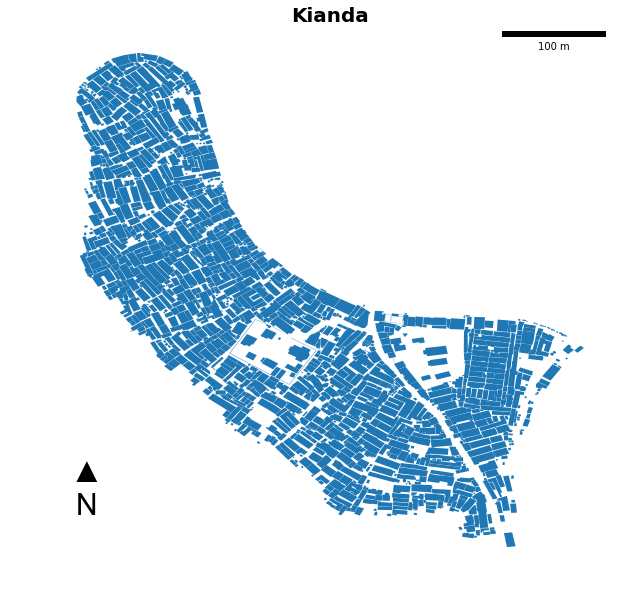

In [45]:
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar
fig, ax = plt.subplots(1, figsize=(10,10))
_ = ax.axis('off')
ax.set_title("Kianda", fontsize = 20, fontweight ="bold")
slum.plot(ax=ax)#, cmap="Set2")
scalebar = ScaleBar(100000)
plt.gca().add_artist(scalebar)
left, right = ax.get_xlim()
top,bottom = ax.get_ylim()
print ("X Coords ", left, right)
print ("Y Coords ", top, bottom)
ax.text(36.772, -1.3135,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial')
#plt.xlim(5111241.442246126, 5110470.7432383616)
#print (plt.ylim(-19810661.130230784,-19811581.307774257 ))

In [ ]:
fig2, ax2 = plt.subplots(1, figsize=(12,12))
_ = ax2.axis('off')
ax2.set_title("Kianda", fontsize = 20, fontweight ="bold")
slum.plot(ax=ax2)
plt.ylim(-19810661.130230784,-19811581.307774257)
plt.xlim(5111241.442246126, 5110470.7432383616)

In [ ]:
h1 = slum[slum["STR_CODE"] == "KIAS1S10S0"]
house_center = h1.centroid
house_center

In [ ]:
business_centers = slum_c.centroid
business_centers

In [ ]:
#import pandas as pd
import math

In [ ]:
distances = []
for point2 in business_centers:
    distance = (math.acos(math.sin(math.radians(house_center.y))*math.sin(math.radians(point2.y))+ \
                         math.cos(math.radians(house_center.y))*math.cos(math.radians(point2.y)) \
                         *math.cos(math.radians(point2.x)-math.radians(house_center.x)))*6371)*1000
    distances.append(distance)
    #print ("{0:8.4f}".format(distance))
distances.sort()
distances

In [ ]:
import pandas as pd

In [ ]:
dis_list = []
for x in water2:
    dis_list.append(float(house_center.distance(x)))
dist2 = pd.Series(dis_list)

In [ ]:
dist2

In [ ]:
dist2[0][1]

In [ ]:
dis_list.sort()
dis_list

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 12))
slum_c.plot(ax =ax)
f.suptitle("Kianda Commercial Businesses")
#slum_c.plot()

In [ ]:
water = gpd.read_file(".\\KIANDA_shapefile\\KIANDA_INFRA\\KIANDA_waterPT\\kibera_water_PT.shp")

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 12))
water.plot(ax =ax)